In [1]:
import random
import torch
from torch import nn, optim
import numpy as np
import math
from IPython import display

In [2]:
import plot_lib

In [3]:
plot_lib.set_default()

In [9]:
seed = 42
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # кол-во точек
D = 2     # размерность данных (плоскость)
C = 3     # количество признаков
H = 100  # количество нейронов в скрытом слое

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"

X: torch.Size([3000, 2])
y: torch.Size([3000])


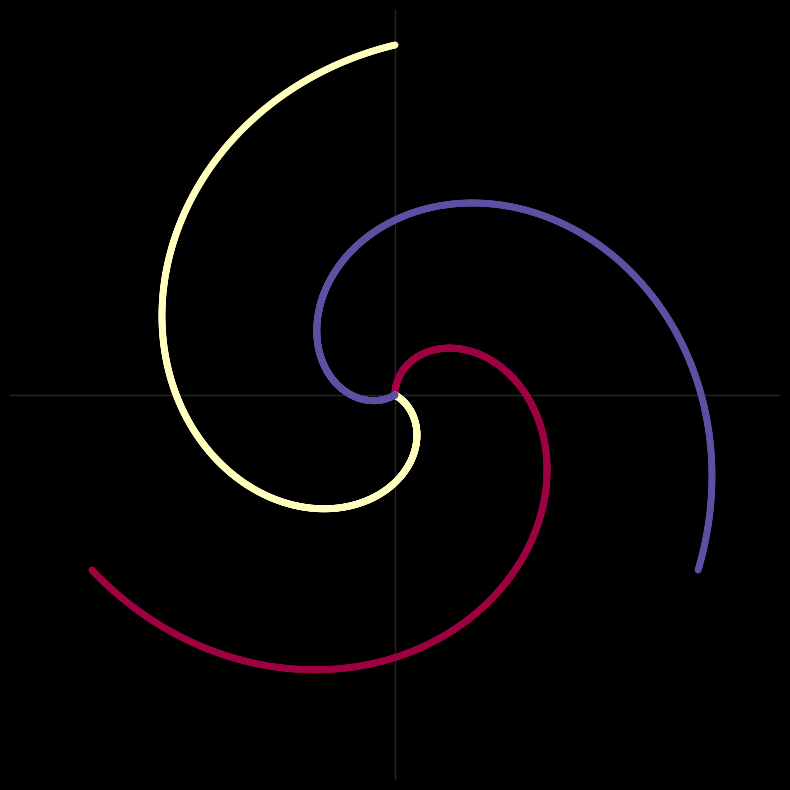

In [11]:
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype=torch.long).to(device)

for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    inner_var = torch.linspace(
        (2 * math.pi / C) * (c),
        (2 * math.pi / C) * (c + 2),
        N
    ) + torch.randn(N) * 0

    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("X:", X.shape)
print("y:", y.shape)

plot_lib.plot_data(X, y)

In [15]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C),
)

model.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)

In [16]:
def make_train_step(model, loss_fn, optimizer):
    def train_step(X, y):
        model.train()
        yhat = model(X)
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    return train_step

In [17]:
lambda12 = 0.00001
lr = 0.1
n_epochs = 1000
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=lambda12)
train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
    loss = train_step(X, y)

print(loss)

0.7562819719314575


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


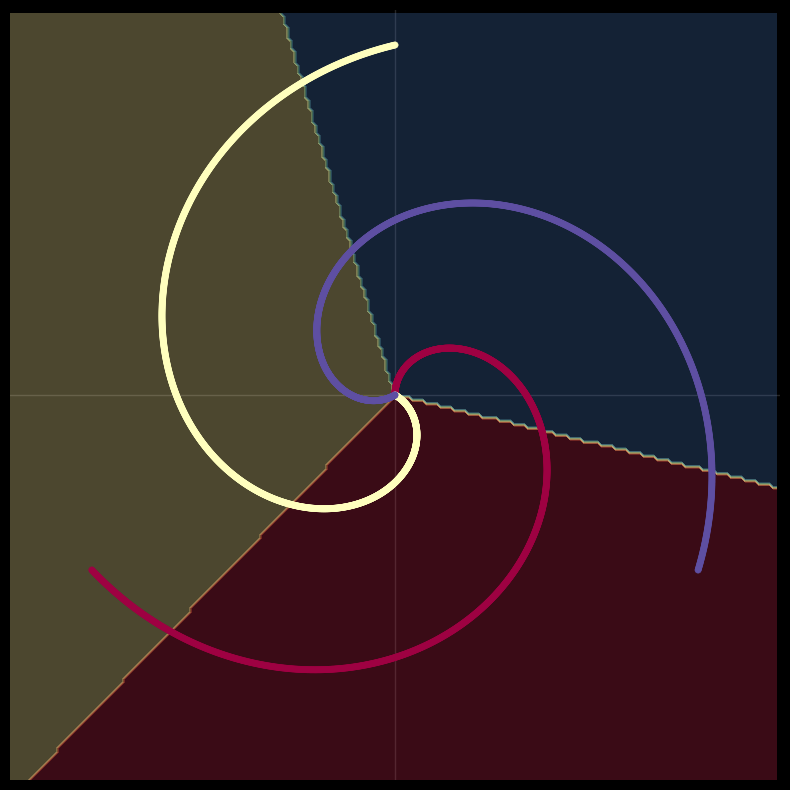

In [18]:
print(model)
plot_lib.plot_model(X, y, model)

In [19]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
model.to(device)

lambda_l2 = 0.00001
lr = 0.1
n_epochs = 1000
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=lambda_l2)
train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
   loss = train_step(X, y)

print(loss)

0.008047005161643028


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


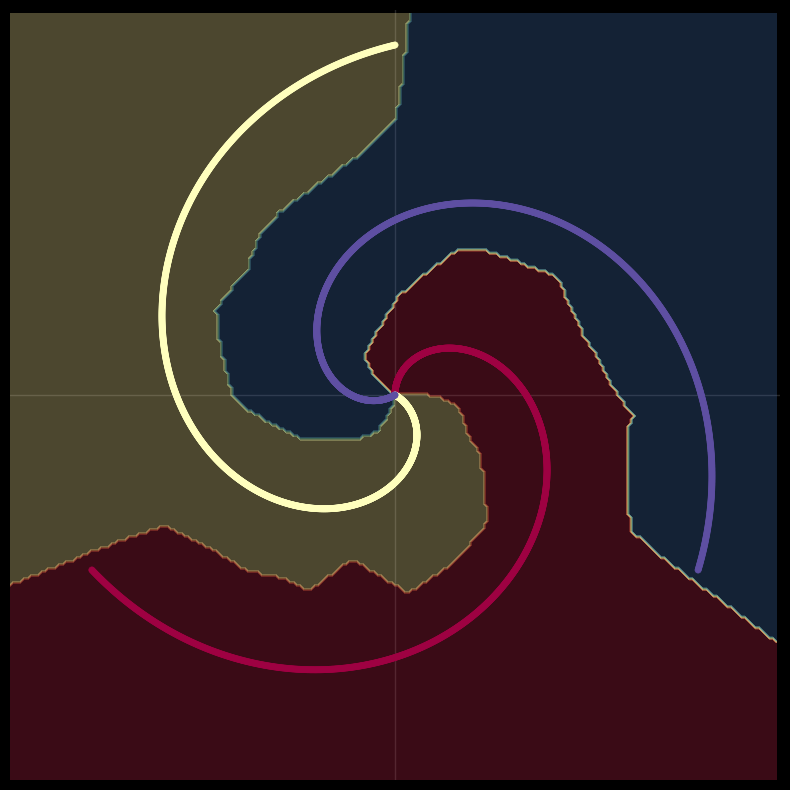

In [21]:
print(model)
plot_lib.plot_model(X, y, model)